# Model CNN Tensorflow

Cara mempersiapkan data MNIST, membuat network CNN, dan melakukan training dengan tensorflow-keras

## 1. Import library yang dibutuhkan

In [1]:
import tensorflow as tf
import numpy as np
import h5py
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.image import imread
import math

from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
import tensorflow.python.keras
# import tensorflow.contrib.keras as keras
from keras.utils import to_categorical

import os

Using TensorFlow backend.


## 2. Persiapkan data mnist

In [2]:
#Data MNIST
# train -> data untuk training
# test -> data untuk validasi
# x -> gambar input
# y -> label
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

img_rows, img_cols = 28, 28
    
#Siapkan matrix training 
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
# print the final input shape ready for training
print("Train matrix shape", x_train.shape)
print("Test matrix shape", x_test.shape)
# one-hot encoding using keras' numpy-related utilities
# one hot encoding = index neuron dengan nilai paling tinggi menjadi hasil klasifikasi
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)



Train matrix shape (60000, 28, 28, 1)
Test matrix shape (10000, 28, 28, 1)
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


## 3. Contoh gambar input

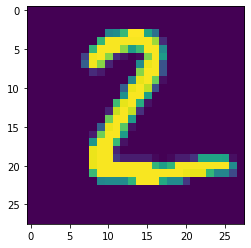

In [3]:
img = x_test[1].reshape(28,28)
plt.imshow(img)
plt.show()

## 4. Deskripsi Model

stride = 0, padding = 0, tidak pakai bias.

Convolution(16 filter, 3x3) -> Convolution(16 filter, 3x3) -> Neural Network(10 neuron) -> Neural Network(10 neuron)

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), use_bias=False, activation=tf.nn.relu,input_shape=(28,28,1), name='layer_1'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
  tf.keras.layers.Conv2D(16, (3,3), use_bias=False, activation=tf.nn.relu, name='layer_2'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
  tf.keras.layers.Flatten(),
    
  tf.keras.layers.Dense(10, use_bias=False, activation=tf.nn.relu, name='layer_3'),
  tf.keras.layers.Dense(10, use_bias=False, activation=tf.nn.softmax, name='layer_Output'),
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Conv2D)             (None, 26, 26, 16)        144       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
layer_2 (Conv2D)             (None, 11, 11, 16)        2304      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
layer_3 (Dense)              (None, 10)                4000      
_________________________________________________________________
layer_Output (Dense)         (None, 10)                1

# 5. Training Model

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 13s 214us/sample - loss: 2.4643 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 2/3
60000/60000 [==============================] - 12s 201us/sample - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980
Epoch 3/3
60000/60000 [==============================] - 12s 198us/sample - loss: 2.3026 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.0980


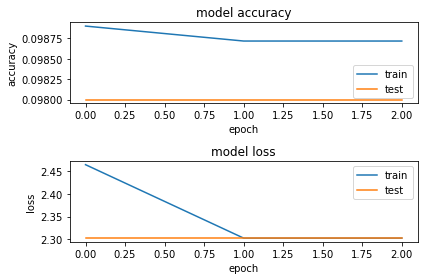

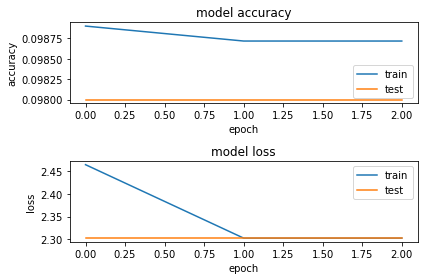

In [5]:
# training the model and saving metrics in history
history = model.fit(x_train, y_train,
          batch_size=128, epochs=3,
          verbose=1,
          validation_data=(x_test, y_test))


# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

## 6. Simpan model ke file .h5

In [6]:
from keras.models import model_from_json   
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("CNN_Model.h5")
print("Saved model to disk")

Saved model to disk


In [7]:
from keract import get_activations
activations = get_activations(model, img.reshape(1,28,28,1), "layer_1")

In [8]:
layer1 = np.array(activations['layer_1'][0])

In [9]:
with h5py.File('CNN_Model.h5','r') as hdf:
    layer_1_data = np.array(hdf.get('layer_1/layer_1/kernel:0'))
    layer_2_data = np.array(hdf.get('layer_2/layer_2/kernel:0'))
    layer_3_data = np.array(hdf.get('layer_3/layer_3/kernel:0'))
    layer_out_data = np.array(hdf.get('layer_Output/layer_Output/kernel:0'))
    

In [10]:
weights = np.array(model.get_weights())

In [11]:
weights[2].shape

(400, 10)

In [12]:
layer_3_data.shape

(400, 10)

In [13]:
np.array_equal(weights[3],layer_out_data)

True